# About Dataset
Rain in Australia

Link https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

Context

Ever wondered if you should carry an umbrella tomorrow? With this dataset, you can predict next-day rain by training classification models on the target variable RainTomorrow.

Content

This dataset comprises about 10 years of daily weather observations from numerous locations across Australia.

RainTomorrow is the target variable to predict. It answers the crucial question: will it rain the next day? (Yes or No).

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import f1_score

# 1. Load & Explore the Data

In [2]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df = df.drop('Date', axis=1)

In [5]:
df.shape

(145460, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [7]:
df.duplicated().sum()

np.int64(215)

In [8]:
df.isnull().sum()

,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566
WindDir3pm,4228


In [9]:
df.value_counts()

Location      MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow
Woomera        31.4    46.2     0.0       22.0         12.6      NNW          61.0           NW          N           30.0          22.0          18.0         7.0          1004.4       1003.0       1.0       1.0       37.9     45.3     No         No              1
AliceSprings  -5.2     19.4     0.0       4.4          10.2      ENE          33.0           W           E           9.0           17.0          17.0         16.0         1022.5       1017.4       0.0       0.0       6.0      19.0     No         No              1
              -4.9     15.1     0.0       4.0          10.1      ESE          48.0           ESE         SE          7.0           22.0          20.0         25.0         1027.0       1024.0       0.0       0.0       5.7      14.4     No         No              1
              -4.4     16.4     0.0       3.4          10.2      E            41.0           E           ESE         6.0           20.0          26.0         19.0         1026.7       1021.6       1.0       0.0       5.1      15.5     No         No              1
Woomera        27.2    43.0     0.0       17.8         9.4       N            61.0           NNE         N           31.0          37.0          7.0          5.0          1008.0       1003.2       4.0       7.0       34.3     42.2     No         Yes             1
                                                                                                                                                                                                                                                                     ..
AliceSprings  -3.4     14.8     0.0       4.0          10.0      E            50.0           ESE         SE          11.0          28.0          55.0         24.0         1031.4       1028.4       3.0       1.0       5.4      13.8     No         No              1
              -3.6     19.3     0.0       4.0          10.3      ENE          31.0           E           NE          11.0          11.0          31.0         20.0         1024.9       1020.2       0.0       0.0       7.3      18.3     No         No              1
                       15.4     0.0       3.8          10.5      ESE          37.0           SSE         ESE         6.0           19.0          45.0         27.0         1029.1       1025.8       0.0       0.0       6.2      14.6     No         No              1
              -3.9     15.9     0.0       3.2          10.5      E            37.0           SE          SE          4.0           15.0          59.0         24.0         1028.8       1024.6       0.0       0.0       4.9      14.8     No         No              1
              -4.0     16.2     0.0       4.4          10.2      ESE          54.0           ESE         ESE         9.0           28.0          29.0         27.0         1028.9       1025.3       0.0       0.0       6.4      15.5     No         No              1
Name: count, Length: 56420, dtype: int64

In [10]:
df.value_counts("RainTomorrow")

,count
RainTomorrow,
No,110316
Yes,31877


#  Data Preprocessing

###Handle Missing Values
1. Drop columns with too many missing values (Evaporation, Sunshine, Cloud9am, Cloud3pm).
2. For numeric columns (e.g. MinTemp, MaxTemp, Rainfall, Pressure9am, etc.) → fill missing with **median**.
3. For categorical columns (e.g. Location, WindDir, RainToday) → fill missing with **most frequent** value.
4. Confirm no missing values remain with `.isna().sum().sum()`.


In [11]:
df["RainTomorrow"] = df["RainTomorrow"].fillna("No")

In [12]:
df["RainTomorrow"].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
encoder = LabelEncoder()

In [14]:
Label_encoder_cols = ["RainToday",	"RainTomorrow"]
for column in Label_encoder_cols:
  df[column] = encoder.fit_transform(df[column])

In [15]:
def add_column_prefixes(df, column, prefix):
    return df[column].apply(lambda x: prefix + str(x))

In [16]:
df['WindDir9am'] = add_column_prefixes(df, 'WindDir9am', "9_")
df['WindDir3pm'] = add_column_prefixes(df, 'WindDir3pm', "3_")

In [17]:
pd.get_dummies(df['WindGustDir'])

,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
145456,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
145457,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
145458,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [18]:
def onehot_encoder(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

In [19]:
categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

df = onehot_encoder(df, categorical_features)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Columns: 117 entries, MinTemp to 3_nan
dtypes: bool(99), float64(16), int64(2)
memory usage: 33.7 MB


In [21]:
df.isnull().sum()

,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
...,...
3_SW,0
3_W,0
3_WNW,0
3_WSW,0


In [22]:
def impute_means(df, columns):
    for column in columns:
        df[column] = df[column].fillna(df[column].mean())

In [23]:
na_columns = ['MinTemp',
              'MaxTemp',
              'Rainfall',
              'Evaporation',
              'Sunshine',
              'WindGustSpeed',
              'WindSpeed9am',
              'WindSpeed3pm',
              'Humidity9am',
              'Humidity3pm',
              'Pressure9am',
              'Pressure3pm',
              'Cloud9am',
              'Cloud3pm',
              'Temp9am',
              'Temp3pm']

impute_means(df, na_columns)

# Feature Selection

In [24]:
y = df['RainTomorrow']
X = df.drop('RainTomorrow', axis=1)

In [25]:
scaler = RobustScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train test Split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.8)

In [30]:
inputs = tf.keras.Input(shape=(116,))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(2, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [32]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7379 - loss: 0.5229 - val_accuracy: 0.8343 - val_loss: 0.3724
Epoch 2/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8512 - loss: 0.3436 - val_accuracy: 0.8417 - val_loss: 0.3600
Epoch 3/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8548 - loss: 0.3337 - val_accuracy: 0.8383 - val_loss: 0.3642
Epoch 4/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8598 - loss: 0.3294 - val_accuracy: 0.8431 - val_loss: 0.3528
Epoch 5/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8614 - loss: 0.3262 - val_accuracy: 0.8428 - val_loss: 0.3575
Epoch 6/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8653 - loss: 0.3142 - val_accuracy: 0.8391 - val_loss: 0.3544
Epoch 7/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8618 - loss: 0.3211 - val_accuracy: 0.8431 - val_loss: 0.3489
Epoch 8/10
728/728 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8668 - loss: 0.3168 - val_accuracy: 0.

# Results

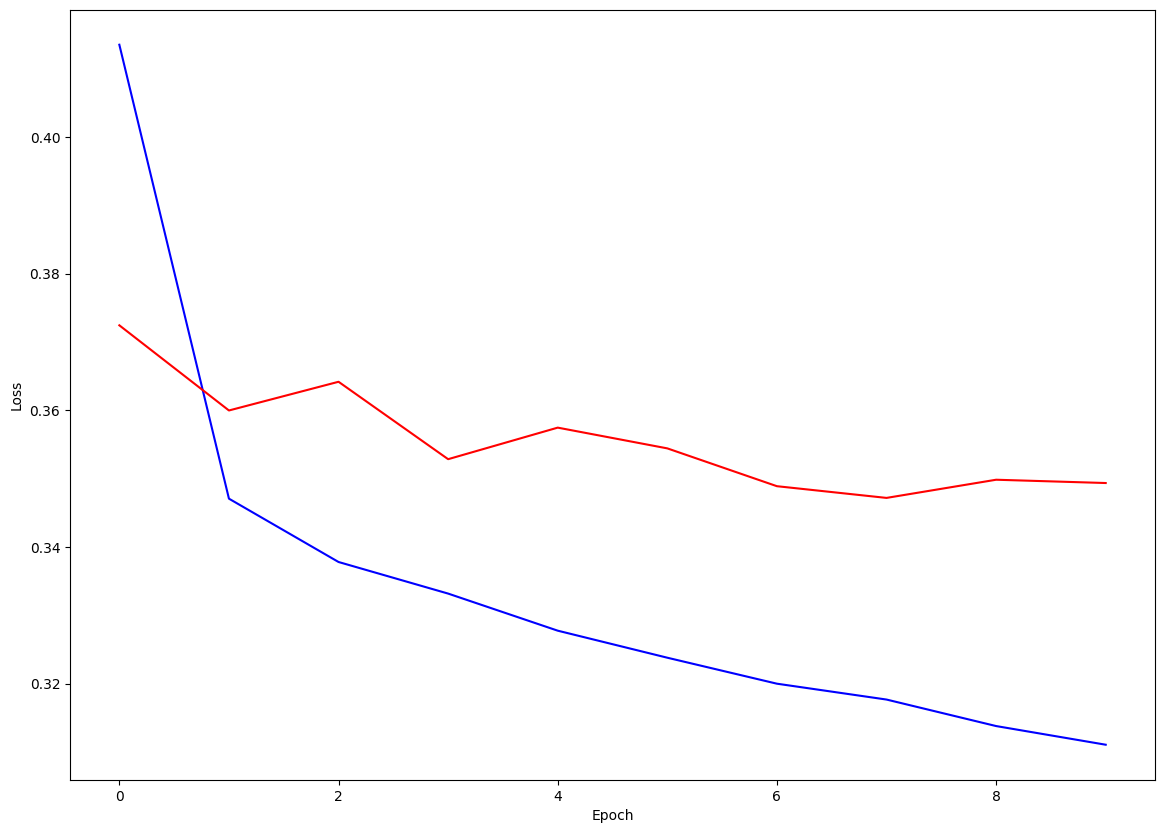

In [34]:
plt.figure(figsize=(14, 10))

plt.plot(history.history['loss'], color='b')
plt.plot(history.history['val_loss'], color='r')

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [35]:
print(f"Model Accuracy: {model.evaluate(x_test, y_test, verbose=0)[1]}")

Model Accuracy: 0.8490993976593018


In [36]:
y_pred = model.predict(x_test)

3637/3637 ━━━━━━━━━━━━━━━━━━━━ 4s 955us/step


In [37]:
y_pred = list(map(lambda x: np.argmax(x), y_pred))
print(f"Model F1 Score: {f1_score(y_test, y_pred)}")

Model F1 Score: 0.6279976273197186
